<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [15]:

def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    s = []
    for i in range(len(X)):
        s.append(np.dot(X[i],V[i]))
    return sum(s)
    pass
x = np.array([[1,1,1],[2,2,2],[3,3,3]])
v = np.array([2,2,2])
X = [x,x]
V = [v,v]
print(sum_prod(X,V))

[[1 1 1]
 [2 2 2]
 [3 3 3]]
[2 2 2]
[12 24 36]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [62]:

def binarize(M, threshold=0.5):
    for i in range(len(M)):
        for j in range(len(M[i])):
            if M[i][j] > threshold:
                M[i][j] = 1
            else: 
                M[i][j] = 0
    return M
    pass
a = np.array([[2,4],[0.3,17],[-1,0]])
b = np.full((3,3),6)
d = np.array([[0,0,0],[-1,-1,-1],[30,40,50],[0.5,0.4,0.6]])
print(a)
print(binarize(a), '\n')
print(b)
print(binarize(b), '\n')
print(d)
print(binarize(d), '\n')



[[ 2.   4. ]
 [ 0.3 17. ]
 [-1.   0. ]]
[[1. 1.]
 [0. 1.]
 [0. 0.]] 

[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[1 1 1]
 [1 1 1]
 [1 1 1]] 

[[ 0.   0.   0. ]
 [-1.  -1.  -1. ]
 [30.  40.  50. ]
 [ 0.5  0.4  0.6]]
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 1.]] 



<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [41]:
def unique_rows(mat):
    ar = []
    for i in range(len(mat)):
        ar_row = []
        for j in range(len(mat[i])):
            if mat[i][j] not in ar_row:
                ar_row.append(mat[i][j])
        ar.append(ar_row)
    return ar
    pass

def unique_columns(mat):
    ar = []
    for i in range(len(mat[0])):
        ar_columns = []
        for j in range(len(mat)):
            if mat[j][i] not in ar_columns:
                ar_columns.append(mat[j][i])
        ar.append(ar_columns)
    return ar
    pass
mat1 = [[1,1,1,1],[2,3,4,5],[11,1,4,4]]
mat2 = [[2,2,3],[3,4,3],[1,1,1]]
mat3 = [[2,2],[2,3],[4,4]]
print(unique_rows(mat1), unique_columns(mat1), '----------', sep = '\n')
print(unique_rows(mat2), unique_columns(mat2), '----------', sep = '\n')
print(unique_rows(mat3), unique_columns(mat3), '----------', sep = '\n')

[[1], [2, 3, 4, 5], [11, 1, 4]]
[[1, 2, 11], [1, 3], [1, 4], [1, 5, 4]]
----------
[[2, 3], [3, 4], [1]]
[[2, 3, 1], [2, 4, 1], [3, 1]]
----------
[[2], [2, 3], [4]]
[[2, 4], [2, 3, 4]]
----------


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

([0.034050455498504155, 0.729768762959315], [2.102636479856401, 1.6465147574268988])


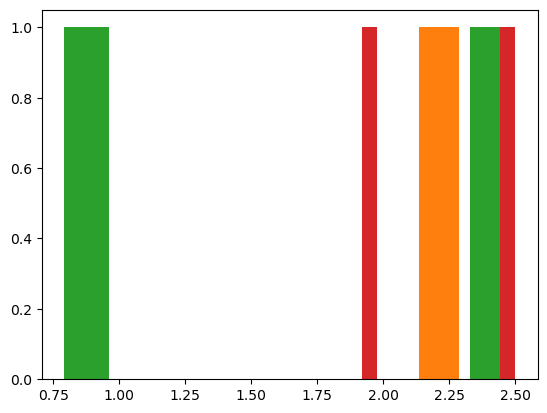

In [7]:

#Стандартное нормальное распределение подразумевает значение чисел в диапазоне [-3:3], стандартная функция 
# numpy.random.rand() -- генерирует числа в диапазоне [-1;1], что тоже в целом подчиняется нормальному распределению
def func(m,n):
    mat = np.dot(np.random.rand(m,n),3)
    desp_lines = []
    wait_lines = []
    for i in range(len(mat)):
        desp_lines.append(mat[i].var())
        wait_lines.append(mat[i].mean())
        plt.hist(mat[i])
        column = []
        desp_columns = []
        wait_columns = []
        for j in range(len(mat[i])):
            column.append(mat[j][i])
        desp_columns.append(np.array(column).var())
        wait_columns.append(np.array(column).mean())
        plt.hist(column)
    return desp_lines, wait_lines
print(func(2,2))

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [23]:

def chess(m, n, a, b):
    ar_1 = []
    for i in range(m):
        ar_2 = []
        if i%2 == 0:
            for j in range(n):
                if j%2 == 0:
                    ar_2.append(a)
                else:
                    ar_2.append(b)
        else:
            for j in range(n):
                if j%2 == 0:
                    ar_2.append(b)
                else:
                    ar_2.append(a)
        ar_1.append(ar_2)
    return np.array(ar_1)
    pass
print(chess(2,2,'a','b'))
print(chess(3,4,'a','b'))
print(chess(1,6,'a','b'))

[['a' 'b']
 ['b' 'a']]
[['a' 'b' 'a' 'b']
 ['b' 'a' 'b' 'a']
 ['a' 'b' 'a' 'b']]
[['a' 'b' 'a' 'b' 'a' 'b']]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

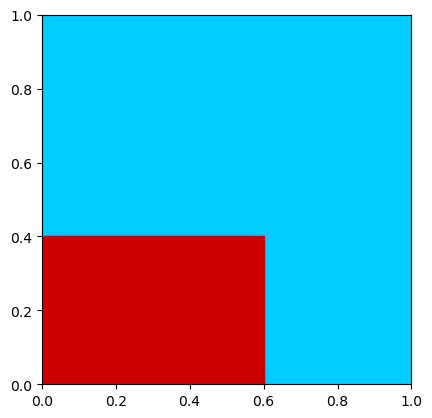

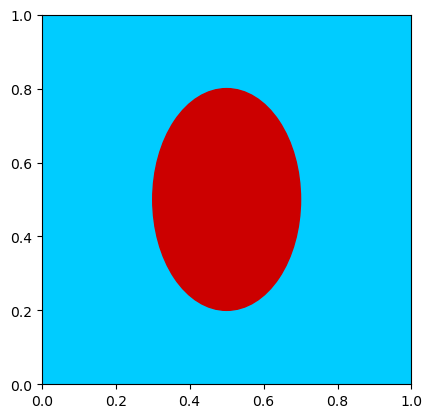

In [4]:

import matplotlib.patches

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    axes = plt.gca()
    axes.set_aspect("equal")
    plt.xlim(0,m)
    plt.ylim(0,n)
    rectangle = matplotlib.patches.Polygon([(0, a),
                                            (b, a),
                                            (b, 0),
                                            (0, 0)], color =rectangle_color)
    axes.add_patch(rectangle)
    axes.set_facecolor(background_color)
    plt.show()
def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    axes = plt.gca()
    axes.set_aspect("equal")
    plt.xlim(0,m)
    plt.ylim(0,n)
    xy = [m/2,n/2]
    Ellipse = matplotlib.patches.Ellipse(xy,a,b, color = ellipse_color)    
    axes.add_patch(Ellipse)
    axes.set_facecolor(background_color)
    plt.show()
    pass  
draw_rectangle(0.4,0.6,1,1,'#CC0000','#00CCFF')
draw_ellipse(0.4,0.6,1,1,'#CC0000','#00CCFF')

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [ ]:
def func():
    dis  = lane.var()
    mean = lane.mean()
    std = lane.std()
    


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [91]:
import numpy as np

def one_hot_encode(vector):
    unique_values = np.unique(vector)
    one_hot_matrix = np.zeros((len(vector), len(unique_values)), dtype=int)
    for i, value in enumerate(vector):
        index = np.where(unique_values == value)[0][0]
        one_hot_matrix[i, index] = 1
    return one_hot_matrix

vector1 = [0, 2, 3, 0]
vector2 = [1, 2, 3, 4]
vector3 = [4, 3, 2, 1]
print(one_hot_encode(vector1))
print('-----------------')
print(one_hot_encode(vector2))
print('-----------------')
print(one_hot_encode(vector3))


[[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]]
-----------------
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
-----------------
[[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]
